In [3]:
#import libraries:

from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline



# For images larger than limit of 178956970 pixels, we need to block the DecompressionBombError: 
Image.MAX_IMAGE_PIXELS = None 




In [4]:

def slice_image_np(img_name, img_path, targetpath='', chopsize=1024, grayscale=True):

    with Image.open(os.path.join(img_path,img_name)) as img:
        imagearr = np.asarray(img)
    
    targetpath = img_path if not targetpath else targetpath
    img_name_clean = os.path.splitext(img_name)[0]
    counter = 0
    
    
    for rownr, row in enumerate(range(0, len(imagearr), chopsize)):
        for colnr, col in enumerate(range(0, len(imagearr), chopsize)):
            counter += 1
            #if counter > 10: break
            filename = ('{}_slice_rownr_{}_colnr_{}_row_{}_{}_col_{}_{}_nr_{}.png'.format
                                       (os.path.join(targetpath, img_name_clean), rownr, colnr, row, row+chopsize, col, 
                                        col+chopsize, counter))
            print(filename)
            
            # slice image:
            if grayscale:
                image = imagearr[row : row+chopsize, col : col+chopsize, 0]
            else:
                image = imagearr[row : row+chopsize, col : col+chopsize]
            
            # normalize slice
            #image = (image - np.min(image))/(np.max(image) - np.min(image))  # 0 to 1
            #image = 2*(i - i.min()) / (i.max() - i.min()) - 1               # from -1 to 1
            #image /= 255.0

            # save image
            Image.fromarray(image).save(os.path.join(targetpath, filename))
    
    print(counter)


#slice_image_np('1M01_DAPI_ZERO_Extended.tif', '/Users/omeikar/Dropbox/tnv/')#, grayscale=False)
#slice_image_np('1T_putuk_oliverm7.tif', '/Users/omeikar/Downloads/', chopsize=500, grayscale=True)

In [5]:
def analyze_image(image):
    plt.figure(figsize=(30,30))
    with Image.open(image) as img:
        
        print("image format:", img.format)
        print("image mode:", img.mode)
        print("image size:", img.size)

        halfdim = sum(img.size)//4
        print("RGB of pixel x300, y300:", img.getpixel( (halfdim, halfdim) )) 
        
        #turn to numpy array:
        img_array = np.asarray(img)
        
        print("pixel values of size from the center of the image:")
        
        # leave only one channel from [0,1,2] -> [1] as they are all identical in monochrome image:
        cropsize = 300 if 300//2 > halfdim else halfdim
        #centerpiece = img_array[img.size[0]//2 : img.size[0]//2+cropsize , 
        #                        img.size[1]//2 : img.size[1]//2+cropsize, 0]

        
        #leave all 3 channels (for color images):
        centerpiece = img_array[img.size[0]//2 : img.size[0]//2+cropsize , 
                                img.size[1]//2 : img.size[1]//2+cropsize]
        
        
        print(centerpiece[:1,:9])
        print('Data Type: %s' % img_array.dtype)
        print('Min: %.3f, Max: %.3f' % (img_array.min(), img_array.max()))

        plt.subplot(121)  # originbal image, cropped according to np.array 
        plt.imshow(img.crop((img.size[0]//2, img.size[0]//2, img.size[1]//2+cropsize, img.size[1]//2+cropsize)))

        plt.subplot(122)
        plt.imshow(Image.fromarray(centerpiece)) #convery np.array back to Image

        plt.show()


image format: JPEG
image mode: RGB
image size: (1995, 1995)
RGB of pixel x300, y300: (25, 19, 21)
pixel values of size from the center of the image:
[[[25 19 21]
  [25 19 21]
  [25 19 21]
  [25 19 21]
  [25 19 21]
  [25 19 21]
  [25 19 21]
  [25 19 21]
  [25 19 21]]]
Data Type: uint8
Min: 0.000, Max: 255.000


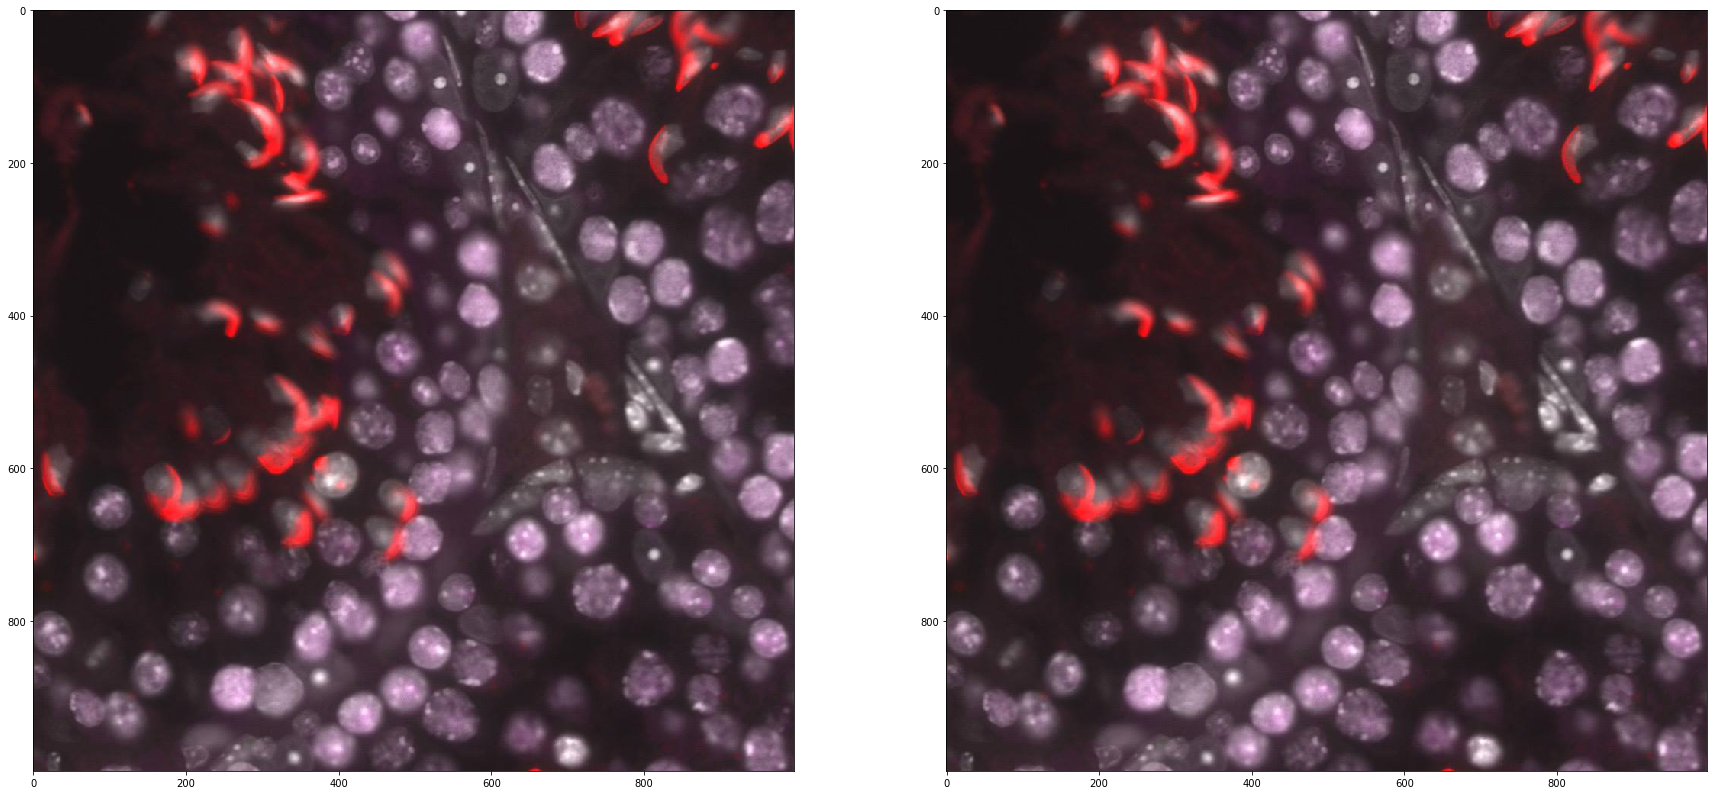

In [6]:
#analyze_image('/Users/omeikar/Documents/KOOL/tehisnärvivõrgud/Project/pildinimi_uus.png')  # for testing
#analyze_image('/Users/omeikar/Dropbox/tnv/1M01_DAPI_ZERO_Extended.tif')  # real raw image
analyze_image('/Users/omeikar/Downloads/colored.jpg')  # color img
#analyze_image('/Users/omeikar/Downloads/colored_slice_rownr_0_colnr_0_row_0_200_col_0_200_nr_1.png')


In [9]:
#take files from folder, slice them and put to new folder based on the original file name
#  01ann2_DAPI.jpg -> tükkideks ja samanimelisse folderisse "slices_01ann2_DAPI"

path = '/Volumes/OM/Ready_images/'
targetpath = '/Volumes/OM/SLICED/'

folders = [e.name for e in os.scandir(path) if e.is_dir(follow_symlinks=False)]
print('\n'.join([i for i in folders]))
count=0

for folder in folders:
    print(folder)
    newfolder = 'slices_' + folder
    files = [e.name for e in os.scandir(path + folder) if e.is_file() and e.name.lower().endswith('.tif')]
    
    for nr, file in enumerate(files):
        if "DAPI" in file:
            if newfolder not in os.listdir(targetpath):
                count+=1
                #if count > 1: exit
                #print (file, path, os.path.join(path, folder))  #image, path, targetpath=path, chopsize= 2048

                os.mkdir(os.path.join(targetpath, newfolder))

                slice_image_np(file, os.path.join(path, folder), os.path.join(targetpath, newfolder), chopsize=1024, grayscale=True)
        

1M02_DAPI_ZERO_Extended.tif /Volumes/OM/Ready_images/ /Volumes/OM/Ready_images/1M02 - Annotation 4
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_0_row_0_1024_col_0_1024_nr_1.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_1_row_0_1024_col_1024_2048_nr_2.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_2_row_0_1024_col_2048_3072_nr_3.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_3_row_0_1024_col_3072_4096_nr_4.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_4_row_0_1024_col_4096_5120_nr_5.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_5_row_0_1024_col_5120_6144_nr_6.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_0_colnr_6_row_0_1024_col_6144_7168_nr_7.png
/Volumes/OM/SLICED/sli

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_15_row_2048_3072_col_15360_16384_nr_64.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_16_row_2048_3072_col_16384_17408_nr_65.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_17_row_2048_3072_col_17408_18432_nr_66.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_18_row_2048_3072_col_18432_19456_nr_67.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_19_row_2048_3072_col_19456_20480_nr_68.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_20_row_2048_3072_col_20480_21504_nr_69.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_2_colnr_21_row_2048_3072_col_21504_22528_nr_70.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_6_row_5120_6144_col_6144_7168_nr_127.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_7_row_5120_6144_col_7168_8192_nr_128.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_8_row_5120_6144_col_8192_9216_nr_129.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_9_row_5120_6144_col_9216_10240_nr_130.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_10_row_5120_6144_col_10240_11264_nr_131.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_11_row_5120_6144_col_11264_12288_nr_132.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_5_colnr_12_row_5120_6144_col_12288_13312_nr_133.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_sli

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_7_colnr_20_row_7168_8192_col_20480_21504_nr_189.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_7_colnr_21_row_7168_8192_col_21504_22528_nr_190.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_7_colnr_22_row_7168_8192_col_22528_23552_nr_191.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_7_colnr_23_row_7168_8192_col_23552_24576_nr_192.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_8_colnr_0_row_8192_9216_col_0_1024_nr_193.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_8_colnr_1_row_8192_9216_col_1024_2048_nr_194.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_8_colnr_2_row_8192_9216_col_2048_3072_nr_195.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slic

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_11_row_10240_11264_col_11264_12288_nr_252.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_12_row_10240_11264_col_12288_13312_nr_253.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_13_row_10240_11264_col_13312_14336_nr_254.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_14_row_10240_11264_col_14336_15360_nr_255.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_15_row_10240_11264_col_15360_16384_nr_256.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_16_row_10240_11264_col_16384_17408_nr_257.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_10_colnr_17_row_10240_11264_col_17408_18432_nr_258.png
/Volumes/OM/SLICED/slices_1M02 - Annotati

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_2_row_13312_14336_col_2048_3072_nr_315.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_3_row_13312_14336_col_3072_4096_nr_316.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_4_row_13312_14336_col_4096_5120_nr_317.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_5_row_13312_14336_col_5120_6144_nr_318.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_6_row_13312_14336_col_6144_7168_nr_319.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_7_row_13312_14336_col_7168_8192_nr_320.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_13_colnr_8_row_13312_14336_col_8192_9216_nr_321.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_E

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_15_row_15360_16384_col_15360_16384_nr_376.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_16_row_15360_16384_col_16384_17408_nr_377.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_17_row_15360_16384_col_17408_18432_nr_378.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_18_row_15360_16384_col_18432_19456_nr_379.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_19_row_15360_16384_col_19456_20480_nr_380.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_20_row_15360_16384_col_20480_21504_nr_381.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_15_colnr_21_row_15360_16384_col_21504_22528_nr_382.png
/Volumes/OM/SLICED/slices_1M02 - Annotati

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_6_row_18432_19456_col_6144_7168_nr_439.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_7_row_18432_19456_col_7168_8192_nr_440.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_8_row_18432_19456_col_8192_9216_nr_441.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_9_row_18432_19456_col_9216_10240_nr_442.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_10_row_18432_19456_col_10240_11264_nr_443.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_11_row_18432_19456_col_11264_12288_nr_444.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_18_colnr_12_row_18432_19456_col_12288_13312_nr_445.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_D

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_20_colnr_19_row_20480_21504_col_19456_20480_nr_500.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_20_colnr_20_row_20480_21504_col_20480_21504_nr_501.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_20_colnr_21_row_20480_21504_col_21504_22528_nr_502.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_20_colnr_22_row_20480_21504_col_22528_23552_nr_503.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_20_colnr_23_row_20480_21504_col_23552_24576_nr_504.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_21_colnr_0_row_21504_22528_col_0_1024_nr_505.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_21_colnr_1_row_21504_22528_col_1024_2048_nr_506.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02

/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_13_row_23552_24576_col_13312_14336_nr_566.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_14_row_23552_24576_col_14336_15360_nr_567.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_15_row_23552_24576_col_15360_16384_nr_568.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_16_row_23552_24576_col_16384_17408_nr_569.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_17_row_23552_24576_col_17408_18432_nr_570.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_18_row_23552_24576_col_18432_19456_nr_571.png
/Volumes/OM/SLICED/slices_1M02 - Annotation 4/1M02_DAPI_ZERO_Extended_slice_rownr_23_colnr_19_row_23552_24576_col_19456_20480_nr_572.png
/Volumes/OM/SLICED/slices_1M02 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_5_row_2048_3072_col_5120_6144_nr_54.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_6_row_2048_3072_col_6144_7168_nr_55.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_7_row_2048_3072_col_7168_8192_nr_56.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_8_row_2048_3072_col_8192_9216_nr_57.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_9_row_2048_3072_col_9216_10240_nr_58.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_10_row_2048_3072_col_10240_11264_nr_59.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_11_row_2048_3072_col_11264_12288_nr_60.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_2

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_20_row_4096_5120_col_20480_21504_nr_117.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_21_row_4096_5120_col_21504_22528_nr_118.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_22_row_4096_5120_col_22528_23552_nr_119.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_23_row_4096_5120_col_23552_24576_nr_120.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_0_row_5120_6144_col_0_1024_nr_121.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_1_row_5120_6144_col_1024_2048_nr_122.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_2_row_5120_6144_col_2048_3072_nr_123.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slic

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_10_row_7168_8192_col_10240_11264_nr_179.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_11_row_7168_8192_col_11264_12288_nr_180.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_12_row_7168_8192_col_12288_13312_nr_181.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_13_row_7168_8192_col_13312_14336_nr_182.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_14_row_7168_8192_col_14336_15360_nr_183.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_15_row_7168_8192_col_15360_16384_nr_184.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_16_row_7168_8192_col_16384_17408_nr_185.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_E

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_2_row_10240_11264_col_2048_3072_nr_243.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_3_row_10240_11264_col_3072_4096_nr_244.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_4_row_10240_11264_col_4096_5120_nr_245.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_5_row_10240_11264_col_5120_6144_nr_246.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_6_row_10240_11264_col_6144_7168_nr_247.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_7_row_10240_11264_col_7168_8192_nr_248.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_8_row_10240_11264_col_8192_9216_nr_249.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_E

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_16_row_12288_13312_col_16384_17408_nr_305.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_17_row_12288_13312_col_17408_18432_nr_306.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_18_row_12288_13312_col_18432_19456_nr_307.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_19_row_12288_13312_col_19456_20480_nr_308.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_20_row_12288_13312_col_20480_21504_nr_309.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_21_row_12288_13312_col_21504_22528_nr_310.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_22_row_12288_13312_col_22528_23552_nr_311.png
/Volumes/OM/SLICED/slices_1M05 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_5_row_15360_16384_col_5120_6144_nr_366.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_6_row_15360_16384_col_6144_7168_nr_367.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_7_row_15360_16384_col_7168_8192_nr_368.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_8_row_15360_16384_col_8192_9216_nr_369.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_9_row_15360_16384_col_9216_10240_nr_370.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_10_row_15360_16384_col_10240_11264_nr_371.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_11_row_15360_16384_col_11264_12288_nr_372.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_18_row_17408_18432_col_18432_19456_nr_427.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_19_row_17408_18432_col_19456_20480_nr_428.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_20_row_17408_18432_col_20480_21504_nr_429.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_21_row_17408_18432_col_21504_22528_nr_430.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_22_row_17408_18432_col_22528_23552_nr_431.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_23_row_17408_18432_col_23552_24576_nr_432.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_18_colnr_0_row_18432_19456_col_0_1024_nr_433.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_8_row_20480_21504_col_8192_9216_nr_489.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_9_row_20480_21504_col_9216_10240_nr_490.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_10_row_20480_21504_col_10240_11264_nr_491.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_11_row_20480_21504_col_11264_12288_nr_492.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_12_row_20480_21504_col_12288_13312_nr_493.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_13_row_20480_21504_col_13312_14336_nr_494.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_14_row_20480_21504_col_14336_15360_nr_495.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/

/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_22_row_22528_23552_col_22528_23552_nr_551.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_23_row_22528_23552_col_23552_24576_nr_552.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_23_colnr_0_row_23552_24576_col_0_1024_nr_553.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_23_colnr_1_row_23552_24576_col_1024_2048_nr_554.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_23_colnr_2_row_23552_24576_col_2048_3072_nr_555.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_23_colnr_3_row_23552_24576_col_3072_4096_nr_556.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZERO_Extended_slice_rownr_23_colnr_4_row_23552_24576_col_4096_5120_nr_557.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 1/1M05_DAPI_ZER

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_14_row_1024_2048_col_14336_15360_nr_38.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_15_row_1024_2048_col_15360_16384_nr_39.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_16_row_1024_2048_col_16384_17408_nr_40.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_17_row_1024_2048_col_17408_18432_nr_41.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_18_row_1024_2048_col_18432_19456_nr_42.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_19_row_1024_2048_col_19456_20480_nr_43.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_1_colnr_20_row_1024_2048_col_20480_21504_nr_44.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_8_row_4096_5120_col_8192_9216_nr_101.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_9_row_4096_5120_col_9216_10240_nr_102.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_10_row_4096_5120_col_10240_11264_nr_103.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_11_row_4096_5120_col_11264_12288_nr_104.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_12_row_4096_5120_col_12288_13312_nr_105.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_13_row_4096_5120_col_13312_14336_nr_106.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_4_colnr_14_row_4096_5120_col_14336_15360_nr_107.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extend

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_1_row_7168_8192_col_1024_2048_nr_163.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_2_row_7168_8192_col_2048_3072_nr_164.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_3_row_7168_8192_col_3072_4096_nr_165.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_4_row_7168_8192_col_4096_5120_nr_166.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_5_row_7168_8192_col_5120_6144_nr_167.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_6_row_7168_8192_col_6144_7168_nr_168.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_7_row_7168_8192_col_7168_8192_nr_169.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_7

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_9_colnr_17_row_9216_10240_col_17408_18432_nr_225.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_9_colnr_18_row_9216_10240_col_18432_19456_nr_226.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_9_colnr_19_row_9216_10240_col_19456_20480_nr_227.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_9_colnr_20_row_9216_10240_col_20480_21504_nr_228.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_9_colnr_21_row_9216_10240_col_21504_22528_nr_229.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_9_colnr_22_row_9216_10240_col_22528_23552_nr_230.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_0_row_10240_11264_col_0_1024_nr_231.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZER

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_9_row_12288_13312_col_9216_10240_nr_286.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_10_row_12288_13312_col_10240_11264_nr_287.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_11_row_12288_13312_col_11264_12288_nr_288.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_12_row_12288_13312_col_12288_13312_nr_289.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_13_row_12288_13312_col_13312_14336_nr_290.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_14_row_12288_13312_col_14336_15360_nr_291.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_15_row_12288_13312_col_15360_16384_nr_292.png
/Volumes/OM/SLICED/slices_1M05 - Annotation

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_3_row_15360_16384_col_3072_4096_nr_349.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_4_row_15360_16384_col_4096_5120_nr_350.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_5_row_15360_16384_col_5120_6144_nr_351.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_6_row_15360_16384_col_6144_7168_nr_352.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_7_row_15360_16384_col_7168_8192_nr_353.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_8_row_15360_16384_col_8192_9216_nr_354.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_9_row_15360_16384_col_9216_10240_nr_355.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_19_row_17408_18432_col_19456_20480_nr_411.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_20_row_17408_18432_col_20480_21504_nr_412.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_21_row_17408_18432_col_21504_22528_nr_413.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_22_row_17408_18432_col_22528_23552_nr_414.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_18_colnr_0_row_18432_19456_col_0_1024_nr_415.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_18_colnr_1_row_18432_19456_col_1024_2048_nr_416.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_18_colnr_2_row_18432_19456_col_2048_3072_nr_417.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DA

/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_11_row_20480_21504_col_11264_12288_nr_472.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_12_row_20480_21504_col_12288_13312_nr_473.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_13_row_20480_21504_col_13312_14336_nr_474.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_14_row_20480_21504_col_14336_15360_nr_475.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_15_row_20480_21504_col_15360_16384_nr_476.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_16_row_20480_21504_col_16384_17408_nr_477.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 2/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_17_row_20480_21504_col_17408_18432_nr_478.png
/Volumes/OM/SLICED/slices_1M05 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_5_row_0_1024_col_5120_6144_nr_6.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_6_row_0_1024_col_6144_7168_nr_7.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_7_row_0_1024_col_7168_8192_nr_8.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_8_row_0_1024_col_8192_9216_nr_9.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_9_row_0_1024_col_9216_10240_nr_10.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_10_row_0_1024_col_10240_11264_nr_11.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_11_row_0_1024_col_11264_12288_nr_12.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_12_row_0_1024_col_

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_19_row_2048_3072_col_19456_20480_nr_70.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_20_row_2048_3072_col_20480_21504_nr_71.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_21_row_2048_3072_col_21504_22528_nr_72.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_22_row_2048_3072_col_22528_23552_nr_73.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_23_row_2048_3072_col_23552_24576_nr_74.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_24_row_2048_3072_col_24576_25600_nr_75.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_3_colnr_0_row_3072_4096_col_0_1024_nr_76.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_7_row_5120_6144_col_7168_8192_nr_133.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_8_row_5120_6144_col_8192_9216_nr_134.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_9_row_5120_6144_col_9216_10240_nr_135.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_10_row_5120_6144_col_10240_11264_nr_136.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_11_row_5120_6144_col_11264_12288_nr_137.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_12_row_5120_6144_col_12288_13312_nr_138.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_13_row_5120_6144_col_13312_14336_nr_139.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_19_row_7168_8192_col_19456_20480_nr_195.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_20_row_7168_8192_col_20480_21504_nr_196.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_21_row_7168_8192_col_21504_22528_nr_197.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_22_row_7168_8192_col_22528_23552_nr_198.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_23_row_7168_8192_col_23552_24576_nr_199.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_24_row_7168_8192_col_24576_25600_nr_200.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_8_colnr_0_row_8192_9216_col_0_1024_nr_201.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extende

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_7_row_10240_11264_col_7168_8192_nr_258.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_8_row_10240_11264_col_8192_9216_nr_259.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_9_row_10240_11264_col_9216_10240_nr_260.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_10_row_10240_11264_col_10240_11264_nr_261.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_11_row_10240_11264_col_11264_12288_nr_262.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_12_row_10240_11264_col_12288_13312_nr_263.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_13_row_10240_11264_col_13312_14336_nr_264.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M0

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_19_row_12288_13312_col_19456_20480_nr_320.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_20_row_12288_13312_col_20480_21504_nr_321.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_21_row_12288_13312_col_21504_22528_nr_322.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_22_row_12288_13312_col_22528_23552_nr_323.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_23_row_12288_13312_col_23552_24576_nr_324.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_24_row_12288_13312_col_24576_25600_nr_325.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_13_colnr_0_row_13312_14336_col_0_1024_nr_326.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_6_row_15360_16384_col_6144_7168_nr_382.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_7_row_15360_16384_col_7168_8192_nr_383.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_8_row_15360_16384_col_8192_9216_nr_384.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_9_row_15360_16384_col_9216_10240_nr_385.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_10_row_15360_16384_col_10240_11264_nr_386.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_11_row_15360_16384_col_11264_12288_nr_387.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_12_row_15360_16384_col_12288_13312_nr_388.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_D

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_18_row_17408_18432_col_18432_19456_nr_444.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_19_row_17408_18432_col_19456_20480_nr_445.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_20_row_17408_18432_col_20480_21504_nr_446.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_21_row_17408_18432_col_21504_22528_nr_447.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_22_row_17408_18432_col_22528_23552_nr_448.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_23_row_17408_18432_col_23552_24576_nr_449.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_24_row_17408_18432_col_24576_25600_nr_450.png
/Volumes/OM/SLICED/slices_1M05 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_4_row_20480_21504_col_4096_5120_nr_505.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_5_row_20480_21504_col_5120_6144_nr_506.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_6_row_20480_21504_col_6144_7168_nr_507.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_7_row_20480_21504_col_7168_8192_nr_508.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_8_row_20480_21504_col_8192_9216_nr_509.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_9_row_20480_21504_col_9216_10240_nr_510.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_10_row_20480_21504_col_10240_11264_nr_511.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZE

/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_16_row_22528_23552_col_16384_17408_nr_567.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_17_row_22528_23552_col_17408_18432_nr_568.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_18_row_22528_23552_col_18432_19456_nr_569.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_19_row_22528_23552_col_19456_20480_nr_570.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_20_row_22528_23552_col_20480_21504_nr_571.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_21_row_22528_23552_col_21504_22528_nr_572.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 3/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_22_row_22528_23552_col_22528_23552_nr_573.png
/Volumes/OM/SLICED/slices_1M05 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_5_row_0_1024_col_5120_6144_nr_6.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_6_row_0_1024_col_6144_7168_nr_7.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_7_row_0_1024_col_7168_8192_nr_8.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_8_row_0_1024_col_8192_9216_nr_9.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_9_row_0_1024_col_9216_10240_nr_10.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_10_row_0_1024_col_10240_11264_nr_11.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_11_row_0_1024_col_11264_12288_nr_12.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_0_colnr_12_row_0_1024_col_

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_19_row_2048_3072_col_19456_20480_nr_70.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_20_row_2048_3072_col_20480_21504_nr_71.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_21_row_2048_3072_col_21504_22528_nr_72.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_22_row_2048_3072_col_22528_23552_nr_73.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_23_row_2048_3072_col_23552_24576_nr_74.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_2_colnr_24_row_2048_3072_col_24576_25600_nr_75.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_3_colnr_0_row_3072_4096_col_0_1024_nr_76.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_6_row_5120_6144_col_6144_7168_nr_132.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_7_row_5120_6144_col_7168_8192_nr_133.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_8_row_5120_6144_col_8192_9216_nr_134.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_9_row_5120_6144_col_9216_10240_nr_135.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_10_row_5120_6144_col_10240_11264_nr_136.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_11_row_5120_6144_col_11264_12288_nr_137.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_5_colnr_12_row_5120_6144_col_12288_13312_nr_138.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_sli

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_18_row_7168_8192_col_18432_19456_nr_194.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_19_row_7168_8192_col_19456_20480_nr_195.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_20_row_7168_8192_col_20480_21504_nr_196.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_21_row_7168_8192_col_21504_22528_nr_197.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_22_row_7168_8192_col_22528_23552_nr_198.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_23_row_7168_8192_col_23552_24576_nr_199.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_7_colnr_24_row_7168_8192_col_24576_25600_nr_200.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_E

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_5_row_10240_11264_col_5120_6144_nr_256.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_6_row_10240_11264_col_6144_7168_nr_257.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_7_row_10240_11264_col_7168_8192_nr_258.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_8_row_10240_11264_col_8192_9216_nr_259.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_9_row_10240_11264_col_9216_10240_nr_260.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_10_row_10240_11264_col_10240_11264_nr_261.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_10_colnr_11_row_10240_11264_col_11264_12288_nr_262.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_16_row_12288_13312_col_16384_17408_nr_317.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_17_row_12288_13312_col_17408_18432_nr_318.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_18_row_12288_13312_col_18432_19456_nr_319.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_19_row_12288_13312_col_19456_20480_nr_320.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_20_row_12288_13312_col_20480_21504_nr_321.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_21_row_12288_13312_col_21504_22528_nr_322.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_12_colnr_22_row_12288_13312_col_22528_23552_nr_323.png
/Volumes/OM/SLICED/slices_1M05 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_2_row_15360_16384_col_2048_3072_nr_378.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_3_row_15360_16384_col_3072_4096_nr_379.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_4_row_15360_16384_col_4096_5120_nr_380.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_5_row_15360_16384_col_5120_6144_nr_381.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_6_row_15360_16384_col_6144_7168_nr_382.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_7_row_15360_16384_col_7168_8192_nr_383.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_15_colnr_8_row_15360_16384_col_8192_9216_nr_384.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_E

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_14_row_17408_18432_col_14336_15360_nr_440.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_15_row_17408_18432_col_15360_16384_nr_441.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_16_row_17408_18432_col_16384_17408_nr_442.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_17_row_17408_18432_col_17408_18432_nr_443.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_18_row_17408_18432_col_18432_19456_nr_444.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_19_row_17408_18432_col_19456_20480_nr_445.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_17_colnr_20_row_17408_18432_col_20480_21504_nr_446.png
/Volumes/OM/SLICED/slices_1M05 - Annotati

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_2_row_20480_21504_col_2048_3072_nr_503.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_3_row_20480_21504_col_3072_4096_nr_504.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_4_row_20480_21504_col_4096_5120_nr_505.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_5_row_20480_21504_col_5120_6144_nr_506.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_6_row_20480_21504_col_6144_7168_nr_507.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_7_row_20480_21504_col_7168_8192_nr_508.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_20_colnr_8_row_20480_21504_col_8192_9216_nr_509.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_E

/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_13_row_22528_23552_col_13312_14336_nr_564.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_14_row_22528_23552_col_14336_15360_nr_565.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_15_row_22528_23552_col_15360_16384_nr_566.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_16_row_22528_23552_col_16384_17408_nr_567.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_17_row_22528_23552_col_17408_18432_nr_568.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_18_row_22528_23552_col_18432_19456_nr_569.png
/Volumes/OM/SLICED/slices_1M05 - Annotation 4/1M05_DAPI_ZERO_Extended_slice_rownr_22_colnr_19_row_22528_23552_col_19456_20480_nr_570.png
/Volumes/OM/SLICED/slices_1M05 - Annotati